In [31]:
# Open CV

In [70]:
from matplotlib import pyplot as plt
import cv2
from IPython.display import display, Image, clear_output
import os

In [71]:
%run "~/rare_gits/video-edit/cv_helper.py"

In [72]:
%run "~/rare_gits/video-edit/filter-to-motion.py"

In [87]:
basename = "output.mp4"
input_video_path = os.path.expanduser("~/downloads/igor-magic.mp4")

In [88]:
# process_video(basename, input_video)

In [89]:
input_video

<VideoCapture 0x7fbfa619d810>

In [90]:
def pv2(base_filename: str, input_video):

    state = FrameState(0, 0)

    width = input_video.get(cv2.CAP_PROP_FRAME_WIDTH)  # float `width`
    height = input_video.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`
    in_fps = input_video.get(cv2.CAP_PROP_FPS)  # float `height`
    frame_count = int(input_video.get(cv2.CAP_PROP_FRAME_COUNT))
    ic(width, height, in_fps, frame_count)

    unique_filename = f"{base_filename}_unique.mp4"
    output_unique = LazyVideoWriter(unique_filename, in_fps)
    mask_filename = f"{base_filename}_mask.mp4"
    output_unique_mask = LazyVideoWriter(mask_filename, in_fps)
    output_video_files = [output_unique, output_unique_mask]
    debug_window_refresh_rate = 100

    # start the FPS timer
    fps = FPS().start()
    with typer.progressbar(length=frame_count, label="Processing Video") as progress:
        for (idx, original_frame) in enumerate(video_reader(input_video)):
            # Update UX counters
            fps.update()
            progress.update(1)
            state.idx = idx

            # PERF: Processing at 1/4 size boosts FPS by TK%
            in_frame = shrink_image_half(original_frame)


            # PERF: Motion Mask sampled frames
            motion_mask = to_motion_mask_fast(state, in_frame)

            # skip frames with no motion
            if is_frame_black(motion_mask):
                continue

            # PERF - show_debug_window at on sampled frames
            if idx % debug_window_refresh_rate == 0:
                debug_frame = create_analyze_debug_frame(in_frame, motion_mask)
                burn_in_debug_info(debug_frame, idx, in_fps)
                # cv2.imshow(f"{base_filename} Input", shrink_image_half(debug_frame))
                # cv2.waitKey(1)
                _, jpg = cv2.imencode('.jpeg', original_frame)
                clear_output(True)
                display(Image(data=jpg.tobytes()))
                print ("Hello")
                if idx > 1000: break

            output_unique.write(original_frame)

            # masked_input = cv2.bitwise_and(in_frame, in_frame, mask=motion_mask)
            # output_unique_mask.write(masked_input)

    # stop the timer and display FPS information
    fps.stop()
    ic(int(fps.fps()), int(fps.elapsed()))

    cv2.destroyAllWindows()
    for f in output_video_files:
        f.release()

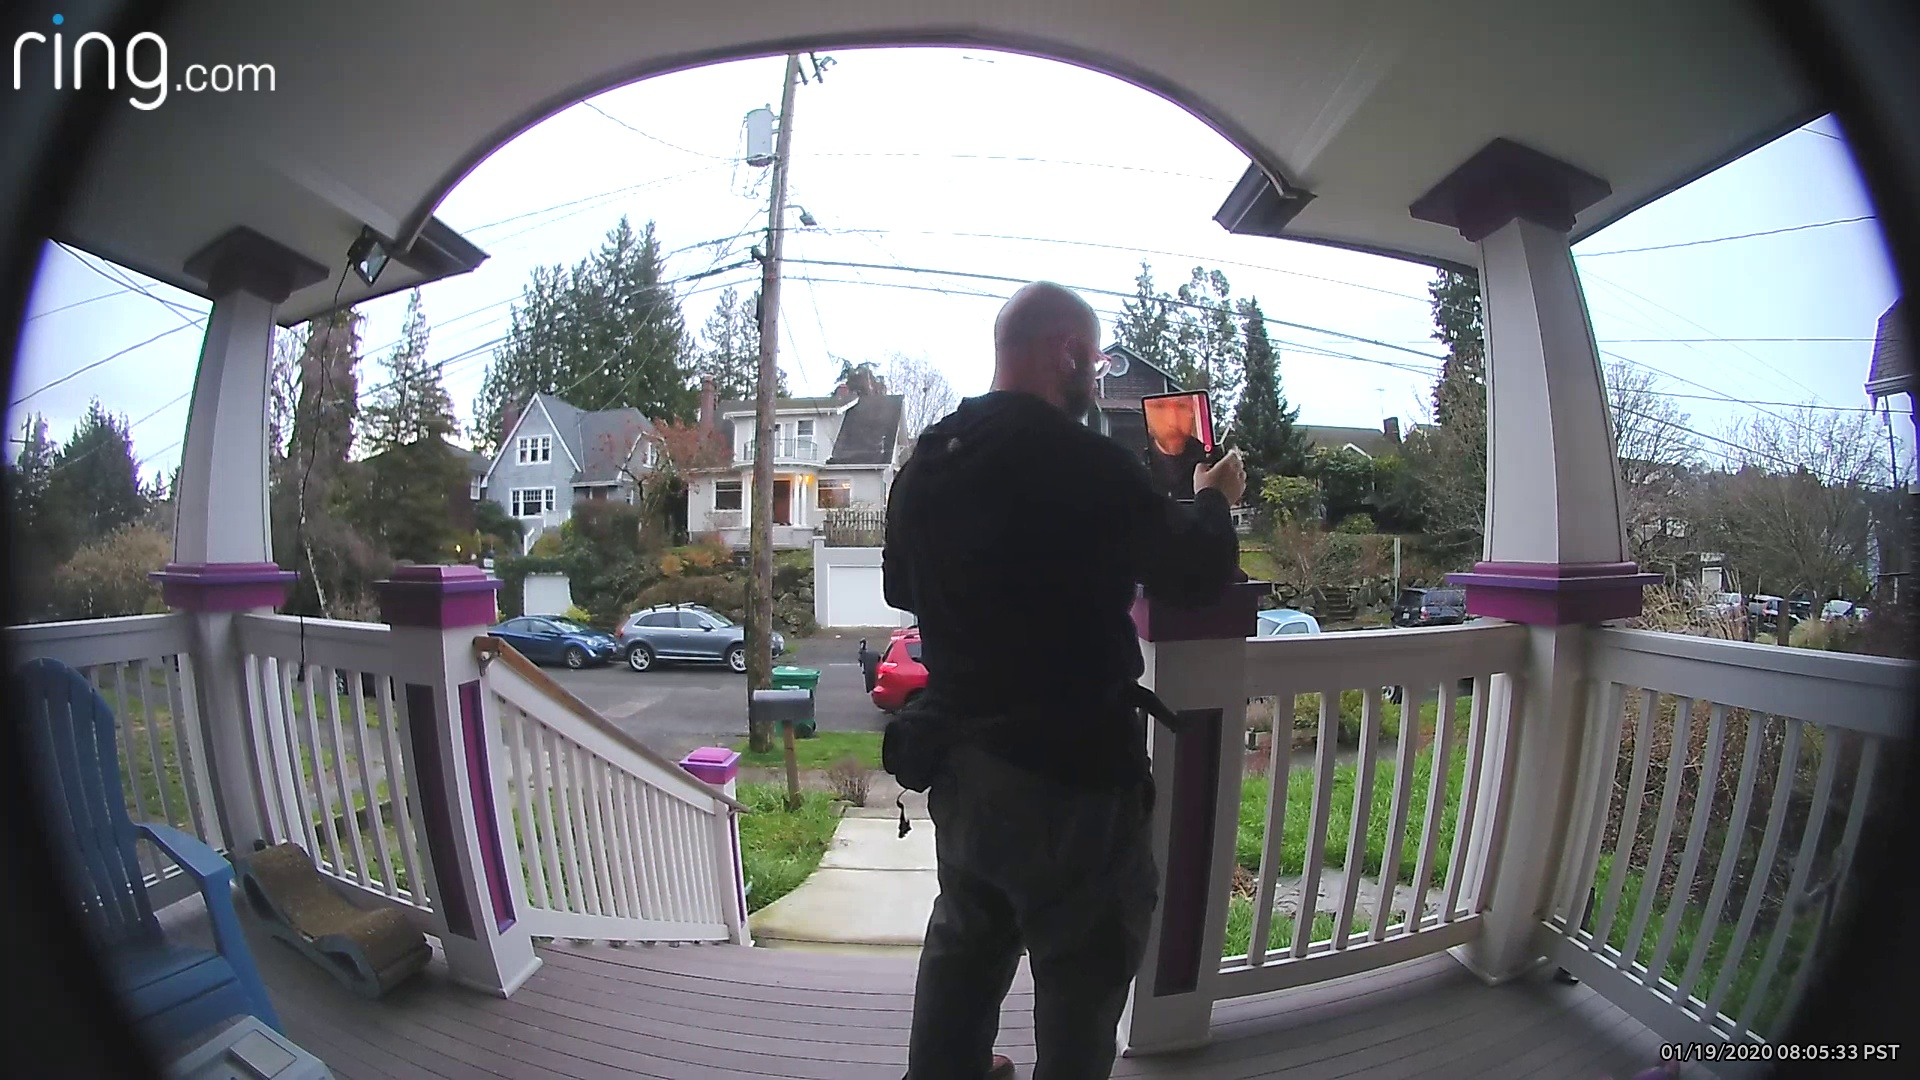

Hello


ic| int(fps.fps()): 54, int(fps.elapsed()): 18


In [92]:
input_video = cv2.VideoCapture(input_video_path)
pv2(basename,input_video)
